# multi class classification (using artifical neural network)

In [62]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import matplotlib.pyplot as plt

In [63]:
# Load MNIST dataset: handwritten digit images (28x28)
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data() 

In [64]:
X_train
# datas are in the form of pixel values

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [87]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

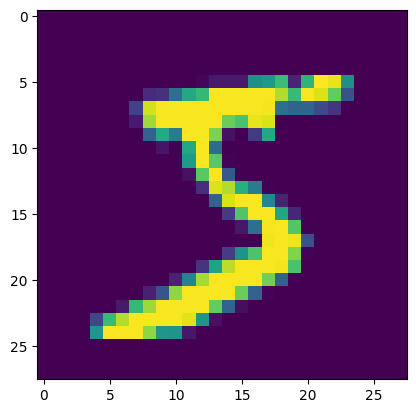

In [66]:
# Show sample image

plt.imshow(X_train[0])

In [67]:
# since X_train are between 0 to 255
# so we will make it in the range of 0 to 1
X_train = X_train/255
X_test = X_test/255

In [68]:
# model building

# converting higher-dimensional array into 1-D(flatten)
 
model = Sequential()
model.add(Flatten(input_shape=(28, 28))) # convert 28 * 28 -> 784

# now adding layer
model.add(Dense(128, activation= "relu")) # hidden layer 1
model.add(Dropout(0.3))

model.add(Dense(40, activation= "relu")) # hidden layer 2
model.add(Dropout(0.3))

model.add(Dense(10, activation= "softmax")) # output layer , 10 output classes(0, 1,2,3,4,5,6,7,8,9)


In [69]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 40)             │         5,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 106,050 (414.26 KB)

 Trainable params: 106,050 (414.26 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
# Compile model
# loss function is sparse_categorical_crossentropy

model.compile(loss="sparse_categorical_crossentropy", optimizer = "Adam", metrics=['accuracy'])

In [71]:
# training the model

history = model.fit(X_train, y_train, epochs = 30, validation_split= 0.2)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7617 - loss: 0.7605 - val_accuracy: 0.9474 - val_loss: 0.1709
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9293 - loss: 0.2520 - val_accuracy: 0.9617 - val_loss: 0.1308
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9454 - loss: 0.1900 - val_accuracy: 0.9689 - val_loss: 0.1102
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9534 - loss: 0.1639 - val_accuracy: 0.9686 - val_loss: 0.1017
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9589 - loss: 0.1404 - val_accuracy: 0.9712 - val_loss: 0.1003
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9622 - loss: 0.1259 - val_accuracy: 0.9716 - val_loss: 0.0983
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9644 - loss: 0.1150 - val_accuracy: 0.9721 - val_loss: 0.0955
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9673 - loss: 0.1135 - 

In [72]:
# prediction

y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step


In [73]:
y_prob

array([[2.7570426e-18, 7.3996825e-17, 2.1285059e-12, ..., 1.0000000e+00,
        4.4279294e-19, 7.4251258e-11],
       [2.9213873e-32, 3.2550790e-10, 1.0000000e+00, ..., 1.1421879e-12,
        5.5853736e-20, 0.0000000e+00],
       [8.4563603e-16, 9.9999738e-01, 2.9274378e-09, ..., 7.5271398e-09,
        2.6161965e-06, 4.5308036e-16],
       ...,
       [7.7481181e-17, 6.5793623e-15, 4.7438156e-17, ..., 4.8256299e-13,
        7.6782087e-17, 1.3399033e-10],
       [4.3429502e-33, 1.8226101e-22, 1.5983524e-26, ..., 2.3711121e-27,
        6.4346789e-15, 9.0509375e-17],
       [4.7478165e-17, 2.3030582e-19, 1.6819626e-17, ..., 3.2838049e-23,
        2.1416521e-15, 2.9177365e-23]], dtype=float32)

In [74]:
# finding which has the highest 

y_pred = y_prob.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [75]:
# This means your model looked at the test images and guessed the digits like:

# 1st image → 7

# 2nd image → 2

# 3rd image → 1

# ...

# Last image → 6

# These are the model’s predictions.

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
# accuracy of the model

accuracy_score(y_test, y_pred) *100

97.95

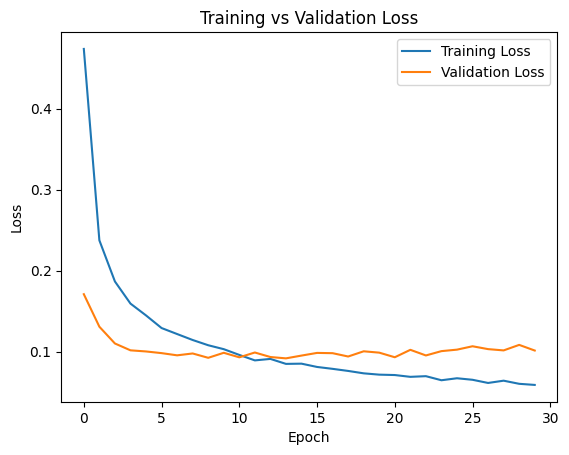

In [78]:
plt.plot(history.history["loss"], label="Training Loss")
# ine showing how the model's error changed on the training data during training.

plt.plot(history.history["val_loss"], label="Validation Loss")
# line showing how the model's error changed on the validation data (data not seen during training).

plt.legend()
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()



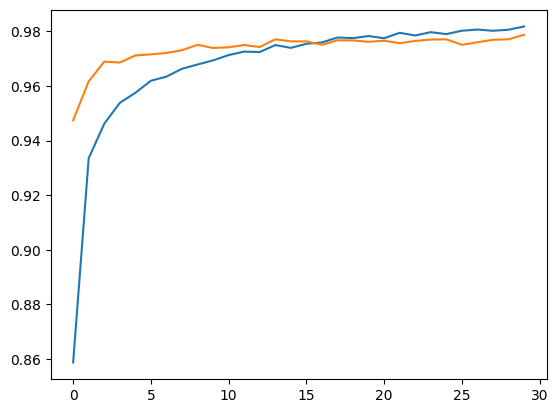

In [79]:
plt.plot(history.history["accuracy"])
# ine showing how the model's error changed on the training data during training.

plt.plot(history.history["val_accuracy"])
# line showing how the model's error changed on the validation data (data not seen during training).


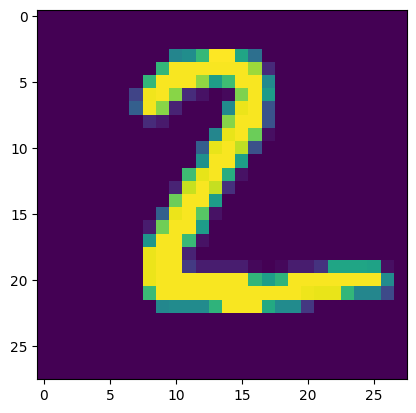

In [84]:
plt.imshow(X_test[])

In [88]:
# Predict digit for 2nd test image
# Reshape for model input, then get the class with highest probability

model.predict(X_test[1].reshape(1, 28, 28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([2])